> <b>Preparation

In [1]:
import os
import wave, os, glob
from pydub import AudioSegment

test_directory = "Data/"
dir = []
dir2 = [] 
for child in os.listdir(test_directory):
    test_path = os.path.join(test_directory, child)
    for i in os.listdir(test_path):
        test_path1 = os.path.join(test_path, i)
        for j in os.listdir(test_path1):
            test_path2 = os.path.join(test_path1, j)
            dir.append(test_path2)
    dir2.append(dir)
    dir = []


sound = AudioSegment.empty()
for index, row in enumerate(dir2):
    for column in row:
        sound+=AudioSegment.from_wav(column)
    print(sound)
    sound.export("Data/speaker"+str(index)+".wav", format="wav")
    sound = AudioSegment.empty()

/anaconda3/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


> Feature extraction
<br>
> Labels
<br>
> Training
<br>
> Confusion Matrix

In [2]:
import librosa
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import sklearn.metrics as sm



def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

#CREATION OF A MATRIX AND Y LABELS
paths = ["Data/speaker"+str(i)+".wav" for i in range(10)]
target =[]
A = []
A1 = [] #for clustering
#A["Target"] = []
row = 0
for path in paths:
    y, sr = librosa.load(path, sr=8000,duration=3.5)
    win_length = int(0.030*sr)
    hop_length = int(0.010*sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=win_length,hop_length=hop_length)
    A1.append(S)
    #lst = S.tolist()
    #print(len(lst))
    for i in S:
        #print(i)
        target.append(row)
        A.append(i)
    row = row+1

mat = np.array(A)

N, M  = mat.shape
print(N, M)
#all_X = np.ones((N, M + 1))
#    all_X[:, 1:] = data
all_X = np.ones((N, M + 1))
all_X[:, 1:] = mat

num_labels = len(np.unique(target))
all_Y = np.eye(num_labels)[target]

#TRAINING AND TESTING MY MODEL

train_X, test_X, train_y, test_y=train_test_split(all_X, all_Y, test_size=0.2, random_state=42)

# Layer's sizes
x_size = train_X.shape[1] 
print(x_size)
h_size = 256                
y_size = train_y.shape[1] 
print(y_size)

# Symbols
X = tf.placeholder("float", shape=[None, x_size])
y = tf.placeholder("float", shape=[None, y_size])

# Weight initializations
w_1 = init_weights((x_size, h_size))
w_2 = init_weights((h_size, y_size))

# Forward propagation
yhat    = forwardprop(X, w_1, w_2)
predict = tf.argmax(yhat, axis=1)

# Backward propagation
cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
updates = tf.train.AdamOptimizer().minimize(cost)


# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(1000):
    # Train with each example
    # for i in tqdm(range(len(train_X))):
    for i in range(len(train_X)):
        sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

    train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                             sess.run(predict, feed_dict={X: train_X, y: train_y}))
    test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                             sess.run(predict, feed_dict={X: test_X, y: test_y}))

    print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
          % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
    #print("\n")

#CONFUSION MATRIX
print("Printing Confusion Matrix")
conf_mat = confusion_matrix(np.argmax(test_y, axis=1), 
             sess.run(predict, feed_dict={X: test_X, y: test_y}))
print(conf_mat)

sess.close()

W0707 21:38:32.248975 4655986112 deprecation.py:323] From <ipython-input-2-5ab94764736b>:78: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



1280 351
352
10
Epoch = 1, train accuracy = 20.31%, test accuracy = 16.41%
Epoch = 2, train accuracy = 25.78%, test accuracy = 23.05%
Epoch = 3, train accuracy = 33.98%, test accuracy = 32.03%
Epoch = 4, train accuracy = 36.52%, test accuracy = 34.77%
Epoch = 5, train accuracy = 38.96%, test accuracy = 38.67%
Epoch = 6, train accuracy = 42.68%, test accuracy = 42.58%
Epoch = 7, train accuracy = 45.31%, test accuracy = 45.31%
Epoch = 8, train accuracy = 47.56%, test accuracy = 46.88%
Epoch = 9, train accuracy = 49.80%, test accuracy = 48.44%
Epoch = 10, train accuracy = 51.27%, test accuracy = 50.00%
Epoch = 11, train accuracy = 53.42%, test accuracy = 52.73%
Epoch = 12, train accuracy = 54.49%, test accuracy = 53.12%
Epoch = 13, train accuracy = 55.66%, test accuracy = 53.52%
Epoch = 14, train accuracy = 56.35%, test accuracy = 53.91%
Epoch = 15, train accuracy = 57.03%, test accuracy = 54.69%
Epoch = 16, train accuracy = 58.01%, test accuracy = 55.08%
Epoch = 17, train accuracy = 59.2

Epoch = 137, train accuracy = 91.02%, test accuracy = 85.16%
Epoch = 138, train accuracy = 91.02%, test accuracy = 85.16%
Epoch = 139, train accuracy = 91.02%, test accuracy = 85.16%
Epoch = 140, train accuracy = 91.02%, test accuracy = 85.16%
Epoch = 141, train accuracy = 90.92%, test accuracy = 85.16%
Epoch = 142, train accuracy = 91.02%, test accuracy = 85.16%
Epoch = 143, train accuracy = 91.02%, test accuracy = 86.33%
Epoch = 144, train accuracy = 91.11%, test accuracy = 86.33%
Epoch = 145, train accuracy = 91.21%, test accuracy = 86.72%
Epoch = 146, train accuracy = 91.31%, test accuracy = 86.72%
Epoch = 147, train accuracy = 91.31%, test accuracy = 86.72%
Epoch = 148, train accuracy = 91.31%, test accuracy = 86.72%
Epoch = 149, train accuracy = 91.41%, test accuracy = 86.72%
Epoch = 150, train accuracy = 91.41%, test accuracy = 86.72%
Epoch = 151, train accuracy = 91.41%, test accuracy = 86.72%
Epoch = 152, train accuracy = 91.41%, test accuracy = 86.72%
Epoch = 153, train accur

Epoch = 272, train accuracy = 93.16%, test accuracy = 89.84%
Epoch = 273, train accuracy = 93.16%, test accuracy = 89.84%
Epoch = 274, train accuracy = 93.16%, test accuracy = 89.84%
Epoch = 275, train accuracy = 93.16%, test accuracy = 89.84%
Epoch = 276, train accuracy = 93.26%, test accuracy = 89.84%
Epoch = 277, train accuracy = 93.26%, test accuracy = 89.84%
Epoch = 278, train accuracy = 93.26%, test accuracy = 89.84%
Epoch = 279, train accuracy = 93.26%, test accuracy = 89.84%
Epoch = 280, train accuracy = 93.36%, test accuracy = 89.84%
Epoch = 281, train accuracy = 93.46%, test accuracy = 89.84%
Epoch = 282, train accuracy = 93.46%, test accuracy = 89.84%
Epoch = 283, train accuracy = 93.46%, test accuracy = 89.84%
Epoch = 284, train accuracy = 93.46%, test accuracy = 89.84%
Epoch = 285, train accuracy = 93.55%, test accuracy = 89.84%
Epoch = 286, train accuracy = 93.55%, test accuracy = 89.84%
Epoch = 287, train accuracy = 93.55%, test accuracy = 89.84%
Epoch = 288, train accur

Epoch = 407, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 408, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 409, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 410, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 411, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 412, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 413, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 414, train accuracy = 94.63%, test accuracy = 89.45%
Epoch = 415, train accuracy = 94.63%, test accuracy = 89.84%
Epoch = 416, train accuracy = 94.82%, test accuracy = 89.84%
Epoch = 417, train accuracy = 94.82%, test accuracy = 89.84%
Epoch = 418, train accuracy = 94.82%, test accuracy = 89.84%
Epoch = 419, train accuracy = 94.82%, test accuracy = 89.84%
Epoch = 420, train accuracy = 94.82%, test accuracy = 89.84%
Epoch = 421, train accuracy = 94.82%, test accuracy = 89.84%
Epoch = 422, train accuracy = 94.92%, test accuracy = 89.84%
Epoch = 423, train accur

Epoch = 542, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 543, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 544, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 545, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 546, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 547, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 548, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 549, train accuracy = 96.00%, test accuracy = 91.02%
Epoch = 550, train accuracy = 96.09%, test accuracy = 91.02%
Epoch = 551, train accuracy = 96.09%, test accuracy = 91.02%
Epoch = 552, train accuracy = 96.19%, test accuracy = 91.02%
Epoch = 553, train accuracy = 96.19%, test accuracy = 91.02%
Epoch = 554, train accuracy = 96.19%, test accuracy = 91.02%
Epoch = 555, train accuracy = 96.19%, test accuracy = 91.02%
Epoch = 556, train accuracy = 96.19%, test accuracy = 91.02%
Epoch = 557, train accuracy = 96.19%, test accuracy = 91.02%
Epoch = 558, train accur

Epoch = 677, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 678, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 679, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 680, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 681, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 682, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 683, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 684, train accuracy = 96.48%, test accuracy = 91.80%
Epoch = 685, train accuracy = 96.58%, test accuracy = 91.80%
Epoch = 686, train accuracy = 96.58%, test accuracy = 91.80%
Epoch = 687, train accuracy = 96.68%, test accuracy = 91.80%
Epoch = 688, train accuracy = 96.68%, test accuracy = 92.19%
Epoch = 689, train accuracy = 96.68%, test accuracy = 92.19%
Epoch = 690, train accuracy = 96.68%, test accuracy = 92.19%
Epoch = 691, train accuracy = 96.68%, test accuracy = 91.80%
Epoch = 692, train accuracy = 96.68%, test accuracy = 91.80%
Epoch = 693, train accur

Epoch = 812, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 813, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 814, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 815, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 816, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 817, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 818, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 819, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 820, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 821, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 822, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 823, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 824, train accuracy = 97.66%, test accuracy = 89.84%
Epoch = 825, train accuracy = 97.66%, test accuracy = 89.45%
Epoch = 826, train accuracy = 97.66%, test accuracy = 89.45%
Epoch = 827, train accuracy = 97.66%, test accuracy = 89.45%
Epoch = 828, train accur

Epoch = 947, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 948, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 949, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 950, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 951, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 952, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 953, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 954, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 955, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 956, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 957, train accuracy = 97.95%, test accuracy = 89.45%
Epoch = 958, train accuracy = 97.95%, test accuracy = 89.06%
Epoch = 959, train accuracy = 97.95%, test accuracy = 89.06%
Epoch = 960, train accuracy = 98.05%, test accuracy = 89.06%
Epoch = 961, train accuracy = 98.05%, test accuracy = 89.06%
Epoch = 962, train accuracy = 98.05%, test accuracy = 89.06%
Epoch = 963, train accur

> Clustering

In [6]:
import pandas as pd

df = pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
0,6.056518e-04,5.521869e-05,0.000027,0.000064,4.488880e-06,4.695459e-05,4.041524e-05,8.400748e-05,8.201180e-05,1.389154e-06,...,1.127864e-06,5.971145e-06,2.214973e-06,6.440425e-06,1.646074e-06,2.823439e-07,1.133142e-06,5.521099e-07,2.987145e-05,4.290243e-04
1,3.048903e-03,2.779756e-04,0.000134,0.000325,2.259741e-05,2.363734e-04,2.034538e-04,4.229009e-04,4.128544e-04,6.993119e-06,...,5.677766e-06,3.005926e-05,1.115037e-05,3.242165e-05,8.286477e-06,1.421343e-06,5.704334e-06,2.779368e-06,1.503754e-04,2.159745e-03
2,8.975986e-04,8.830360e-04,0.000550,0.000033,1.719372e-04,1.332174e-04,7.759687e-05,1.851561e-04,4.636159e-04,1.634249e-04,...,8.688757e-04,7.419882e-04,5.767756e-04,6.799742e-04,8.055811e-04,8.039065e-04,8.305088e-04,7.740312e-04,7.902520e-04,3.102840e-03
3,1.810495e-03,1.781122e-03,0.001109,0.000066,3.468047e-04,2.687053e-04,1.565162e-04,3.734679e-04,9.351333e-04,3.296351e-04,...,1.752560e-03,1.496622e-03,1.163381e-03,1.371537e-03,1.624892e-03,1.621514e-03,1.675172e-03,1.561254e-03,1.593972e-03,6.258561e-03
4,9.366486e-05,1.905270e-03,0.001417,0.000392,4.254211e-04,3.430271e-05,7.586095e-05,2.790980e-04,2.437021e-04,1.107382e-04,...,4.235942e-03,4.186401e-03,4.052362e-03,5.006786e-03,6.054830e-03,5.657572e-03,6.410375e-03,6.723537e-03,5.998365e-03,1.726364e-03
5,9.472907e-05,1.926917e-03,0.001433,0.000397,4.302547e-04,3.469246e-05,7.672288e-05,2.822691e-04,2.464711e-04,1.119964e-04,...,4.284070e-03,4.233967e-03,4.098405e-03,5.063673e-03,6.123625e-03,5.721853e-03,6.483209e-03,6.799930e-03,6.066519e-03,1.745979e-03
6,6.772861e-04,3.546969e-04,0.000542,0.000097,2.440012e-04,8.498729e-05,3.418467e-05,2.531307e-04,4.464621e-05,3.178420e-05,...,1.680944e-03,1.229663e-03,1.613767e-03,1.984407e-03,2.956551e-03,1.982599e-03,2.848285e-03,4.218735e-03,3.196923e-03,1.238940e-03
7,3.444145e-04,1.803710e-04,0.000275,0.000050,1.240798e-04,4.321786e-05,1.738364e-05,1.287224e-04,2.270355e-05,1.616295e-05,...,8.547961e-04,6.253100e-04,8.206349e-04,1.009113e-03,1.503469e-03,1.008194e-03,1.448414e-03,2.145317e-03,1.625704e-03,6.300278e-04
8,8.801503e-05,7.128584e-04,0.001013,0.000227,1.189645e-04,8.913446e-06,1.444061e-05,7.762691e-06,1.149653e-04,5.625326e-05,...,8.950849e-03,7.363178e-03,7.167262e-03,5.927949e-03,6.327774e-03,4.747152e-03,4.694657e-03,5.319383e-03,5.201873e-03,2.256118e-02
9,1.820302e-05,1.474314e-04,0.000210,0.000047,2.460390e-05,1.843454e-06,2.986566e-06,1.605458e-06,2.377679e-05,1.163414e-05,...,1.851189e-03,1.522832e-03,1.482313e-03,1.226002e-03,1.308692e-03,9.817927e-04,9.709358e-04,1.100140e-03,1.075837e-03,4.666041e-03


In [7]:
df['Speakers'] = target 
df.set_index('Speakers')

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
Speakers,,,,,,,,,,,,,,,,,,,,,
0,6.056518e-04,5.521869e-05,0.000027,0.000064,4.488880e-06,4.695459e-05,4.041524e-05,8.400748e-05,8.201180e-05,1.389154e-06,...,1.127864e-06,5.971145e-06,2.214973e-06,6.440425e-06,1.646074e-06,2.823439e-07,1.133142e-06,5.521099e-07,2.987145e-05,4.290243e-04
0,3.048903e-03,2.779756e-04,0.000134,0.000325,2.259741e-05,2.363734e-04,2.034538e-04,4.229009e-04,4.128544e-04,6.993119e-06,...,5.677766e-06,3.005926e-05,1.115037e-05,3.242165e-05,8.286477e-06,1.421343e-06,5.704334e-06,2.779368e-06,1.503754e-04,2.159745e-03
0,8.975986e-04,8.830360e-04,0.000550,0.000033,1.719372e-04,1.332174e-04,7.759687e-05,1.851561e-04,4.636159e-04,1.634249e-04,...,8.688757e-04,7.419882e-04,5.767756e-04,6.799742e-04,8.055811e-04,8.039065e-04,8.305088e-04,7.740312e-04,7.902520e-04,3.102840e-03
0,1.810495e-03,1.781122e-03,0.001109,0.000066,3.468047e-04,2.687053e-04,1.565162e-04,3.734679e-04,9.351333e-04,3.296351e-04,...,1.752560e-03,1.496622e-03,1.163381e-03,1.371537e-03,1.624892e-03,1.621514e-03,1.675172e-03,1.561254e-03,1.593972e-03,6.258561e-03
0,9.366486e-05,1.905270e-03,0.001417,0.000392,4.254211e-04,3.430271e-05,7.586095e-05,2.790980e-04,2.437021e-04,1.107382e-04,...,4.235942e-03,4.186401e-03,4.052362e-03,5.006786e-03,6.054830e-03,5.657572e-03,6.410375e-03,6.723537e-03,5.998365e-03,1.726364e-03
0,9.472907e-05,1.926917e-03,0.001433,0.000397,4.302547e-04,3.469246e-05,7.672288e-05,2.822691e-04,2.464711e-04,1.119964e-04,...,4.284070e-03,4.233967e-03,4.098405e-03,5.063673e-03,6.123625e-03,5.721853e-03,6.483209e-03,6.799930e-03,6.066519e-03,1.745979e-03
0,6.772861e-04,3.546969e-04,0.000542,0.000097,2.440012e-04,8.498729e-05,3.418467e-05,2.531307e-04,4.464621e-05,3.178420e-05,...,1.680944e-03,1.229663e-03,1.613767e-03,1.984407e-03,2.956551e-03,1.982599e-03,2.848285e-03,4.218735e-03,3.196923e-03,1.238940e-03
0,3.444145e-04,1.803710e-04,0.000275,0.000050,1.240798e-04,4.321786e-05,1.738364e-05,1.287224e-04,2.270355e-05,1.616295e-05,...,8.547961e-04,6.253100e-04,8.206349e-04,1.009113e-03,1.503469e-03,1.008194e-03,1.448414e-03,2.145317e-03,1.625704e-03,6.300278e-04
0,8.801503e-05,7.128584e-04,0.001013,0.000227,1.189645e-04,8.913446e-06,1.444061e-05,7.762691e-06,1.149653e-04,5.625326e-05,...,8.950849e-03,7.363178e-03,7.167262e-03,5.927949e-03,6.327774e-03,4.747152e-03,4.694657e-03,5.319383e-03,5.201873e-03,2.256118e-02


In [8]:
from sklearn.decomposition import PCA 
  
pca = PCA(3) 
pca.fit(df) 
  
pca_data = pd.DataFrame(pca.transform(df)) 
  
print(pca_data.head())
pca_data.shape

          0         1         2
0  4.497483 -0.018453 -0.126691
1  4.497492 -0.018341 -0.126380
2  4.497617 -0.016364 -0.124259
3  4.497757 -0.014210 -0.121707
4  4.499254  0.004373 -0.096456


(1280, 3)

In [9]:
from sklearn.cluster import KMeans 
clusters = 10

kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(pca_data) 
print(kmeans.fit(pca_data))
print(kmeans.labels_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[5 5 5 ... 0 0 0]


In [10]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

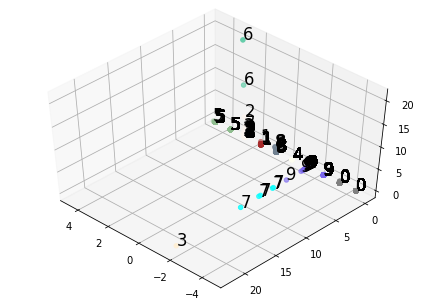

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
#ax = fig.add_subplot(111, projection = '3d') 
#ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
#           c = list(map(lambda label : cluster_colors[label], 
#                                            kmeans.labels_))) 

ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 


str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show()

In [13]:
from collections import Counter

grouping_count = Counter(kmeans.labels_)

print(grouping_count)

Counter({5: 256, 0: 256, 9: 250, 1: 128, 8: 128, 4: 128, 2: 126, 7: 5, 6: 2, 3: 1})
